<a href="https://colab.research.google.com/github/mjahidulalam/HandwrittingRecognition/blob/master/Handwritting_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Handwriting Data/A_Z Handwritten Data.csv")

In [24]:
arr = df.iloc[:,1:].to_numpy()
labels = df.iloc[:,:1].to_numpy().reshape(len(df))

data_train, data_test, labels_train, labels_test = train_test_split(arr, labels, test_size=0.20, random_state=42)

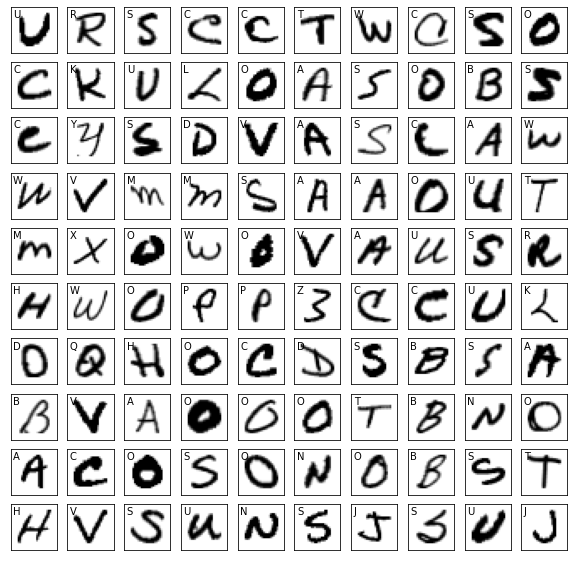

In [25]:
data_train = data_train.reshape(len(labels_train),28,28)
data_test = data_test.reshape(len(labels_test),28,28)

labels_dict = {0:"A", 1:"B",2:"C",3:"D",4:"E",5:"F",6:"G",7:"H",8:"I",9:"J",10:"K",
               11:"L",12:"M",13:"N",14:"O",15:"P",16:"Q",17:"R",18:"S", 19:"T",20:"U",21:"V",22:"W",23:"X",24:"Y",25:"Z",}

fig, ax = plt.subplots(10, 10, figsize=(10, 10))

for row in ax:
  for col in row:
    i = np.random.randint(data_train.shape[0])
    col.imshow(data_train[i], cmap='gray_r')
    col.text(1,6,labels_dict[labels_train[i]],fontsize=10)
    col.set_xticks(())
    col.set_yticks(())

plt.show()

In [26]:
data_train = data_train/255
data_test = data_test/255

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(26, activation='softmax')
])

model.compile(optimizer='adam',
              loss ='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.fit(data_train, labels_train, epochs=20)

Epoch 1/20
9312/9312 [==============================] - 17s 2ms/step - loss: 0.2798 - accuracy: 0.9241
Epoch 2/20
9312/9312 [==============================] - 17s 2ms/step - loss: 0.1267 - accuracy: 0.9644
Epoch 3/20
9312/9312 [==============================] - 19s 2ms/step - loss: 0.0970 - accuracy: 0.9724
Epoch 4/20
9312/9312 [==============================] - 17s 2ms/step - loss: 0.0813 - accuracy: 0.9767
Epoch 5/20
9312/9312 [==============================] - 17s 2ms/step - loss: 0.0714 - accuracy: 0.9795
Epoch 6/20
9312/9312 [==============================] - 18s 2ms/step - loss: 0.0636 - accuracy: 0.9813
Epoch 7/20
9312/9312 [==============================] - 18s 2ms/step - loss: 0.0580 - accuracy: 0.9827
Epoch 8/20
9312/9312 [==============================] - 18s 2ms/step - loss: 0.0526 - accuracy: 0.9841
Epoch 9/20
9312/9312 [==============================] - 18s 2ms/step - loss: 0.0489 - accuracy: 0.9854
Epoch 10/20
9312/9312 [==============================] - 17s 2ms/step - l

In [28]:
test_loss, test_acc = model.evaluate(data_test, labels_test, verbose = 1)

2328/2328 [==============================] - 3s 1ms/step - loss: 0.0771 - accuracy: 0.9848


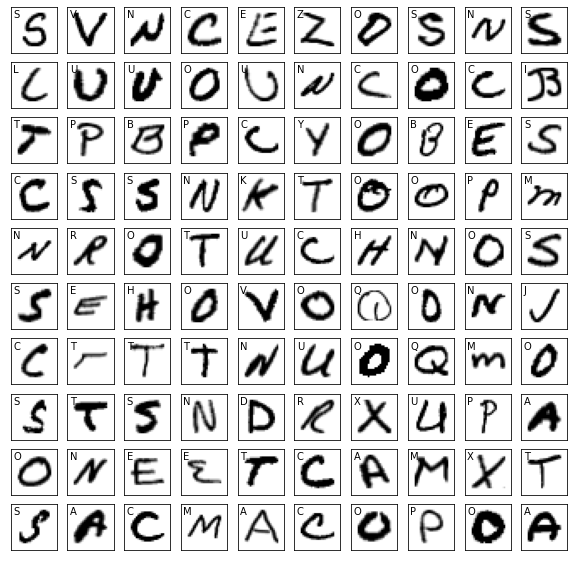

In [29]:
predictions = model.predict(data_test)

fig, ax = plt.subplots(10, 10, figsize=(10, 10))

for row in ax:
  for col in row:
    i = np.random.randint(labels_test.shape[0])
    col.imshow(data_test[i], cmap='gray_r')
    col.text(1,6,labels_dict[np.argmax(predictions[i])],fontsize=10)
    col.set_xticks(())
    col.set_yticks(())

plt.show()